In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option("display.max_columns", None)

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, classification_report

# read in the cleaned data

In [3]:
full_df = pd.read_pickle("full_clean_df.pkl")

# split off a hold out set

In [4]:
full_df, hold_out_df = train_test_split(full_df, test_size=0.2)

In [5]:
len(full_df.columns)

57

In [6]:
full_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'health_insurance_0.0', 'health_insurance_1.0',
       'health_insurance_nan', 'doctor_recc_h1n1_0.0', 'doctor_recc_h1n1_1.0',
       'doctor_recc_h1n1_nan', 'doctor_recc_seasonal_0.0',
       'doctor_recc_seasonal_1.0', 'doctor_recc_seasonal_nan',
       'income_poverty_<= $75,000, Above Poverty', 'income_poverty_> $75,000',
       'income_poverty_

We have two target values right off the bat, lets get those

In [7]:
flu_target = full_df["seasonal_vaccine"]
h1n1_target = full_df["h1n1_vaccine"]

In [8]:
features_df = full_df.drop(labels=["seasonal_vaccine", "h1n1_vaccine"], axis=1)

# Lets look at 9 features first

In [9]:
health_insurance = ['health_insurance_0.0', 'health_insurance_1.0', 'health_insurance_nan']
doctor_recc_h1n1 = ['doctor_recc_h1n1_0.0', 'doctor_recc_h1n1_1.0', 'doctor_recc_h1n1_nan']
h1n1_oppinion = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']

features_df_1 = features_df[health_insurance+doctor_recc_h1n1+h1n1_oppinion]

In [10]:
X_train, X_test, label_train, label_test = train_test_split(features_df_1, h1n1_target, test_size=0.3)
X_train_all, X_test_all, label_train_all, label_test_all = train_test_split(features_df, h1n1_target, test_size=0.3)

# KNN Analysis

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, label_test)))

The score for kNN is
Training:  83.52%
Test set:  82.10%


In [12]:
test_scores = []
train_scores = []
for k in range(1,500,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, label_train)

    train_scores.append(100*knn.score(X_train, label_train))
    test_scores.append(100*knn.score(X_test, label_test))

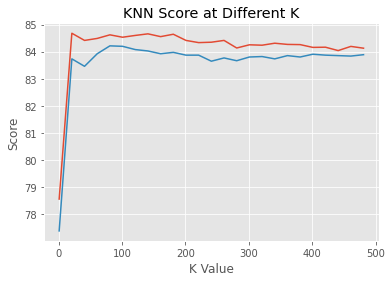

In [13]:
plt.title('KNN Score at Different K')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.plot(range(1,500,20), train_scores)
plt.plot(range(1,500,20), test_scores);

In [14]:
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_train, label_train)

KNeighborsClassifier(n_neighbors=150)

In [15]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(label_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[4301  280]
 [ 657  590]]


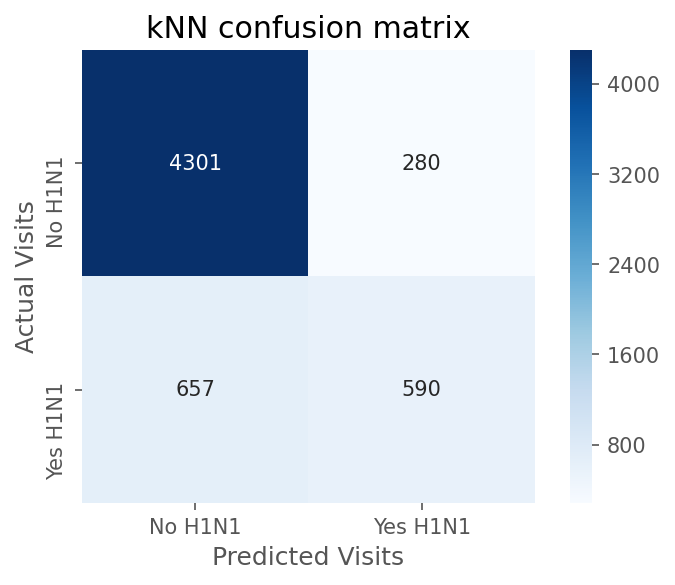

In [16]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,fmt='g',
           xticklabels=['No H1N1', 'Yes H1N1'],
           yticklabels=['No H1N1', 'Yes H1N1'])

plt.xlabel('Predicted Visits')
plt.ylabel('Actual Visits')
plt.title('kNN confusion matrix');

In [17]:
print(classification_report(label_test, knn.predict(X_test), target_names=["No H1N1", "Yes H1N1"]))

              precision    recall  f1-score   support

     No H1N1       0.87      0.94      0.90      4581
    Yes H1N1       0.68      0.47      0.56      1247

    accuracy                           0.84      5828
   macro avg       0.77      0.71      0.73      5828
weighted avg       0.83      0.84      0.83      5828



In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

ROC AUC score =  0.8423834754163102


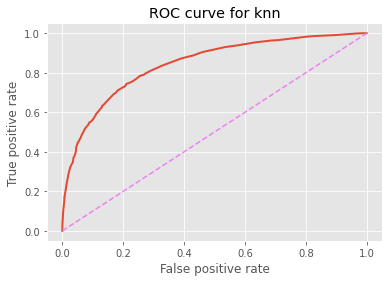

In [19]:
fpr, tpr, thresholds = roc_curve(label_test, knn.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for knn');
print("ROC AUC score = ", roc_auc_score(label_test, knn.predict_proba(X_test)[:,1]))

# Log Regression Analysis

In [20]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  84.57%
Test set:  83.89%


In [23]:
test_scores = []
train_scores = []
for c in range(1,101,5):
    logit = LogisticRegression(C = c/100)
    logit.fit(X_train, label_train)
    train_scores.append(100*logit.score(X_train, label_train))
    test_scores.append(100*logit.score(X_test, label_test))

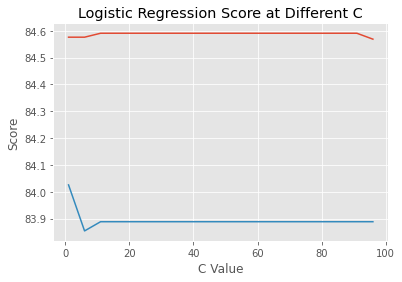

In [24]:
plt.title('Logistic Regression Score at Different C')
plt.xlabel('C Value')
plt.ylabel('Score')
plt.plot(range(1,101,5), train_scores)
plt.plot(range(1,101,5), test_scores);

In [118]:
logit = LogisticRegression()
logit.fit(X_train, label_train)

LogisticRegression()

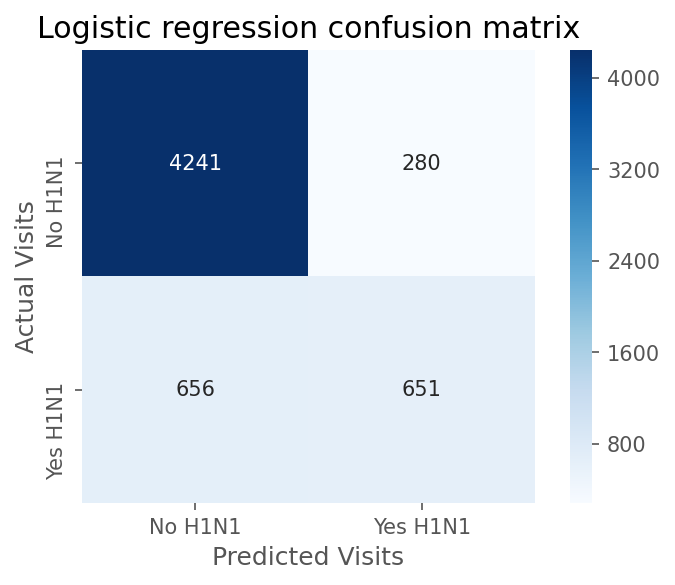

In [119]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_test, logit.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,fmt='g',
           xticklabels=['No H1N1', 'Yes H1N1'],
           yticklabels=['No H1N1', 'Yes H1N1'])

plt.xlabel('Predicted Visits')
plt.ylabel('Actual Visits')
plt.title('Logistic regression confusion matrix');

In [120]:
print(classification_report(label_test, logit.predict(X_test), target_names=["No H1N1", "Yes H1N1"]))

              precision    recall  f1-score   support

     No H1N1       0.87      0.94      0.90      4521
    Yes H1N1       0.70      0.50      0.58      1307

    accuracy                           0.84      5828
   macro avg       0.78      0.72      0.74      5828
weighted avg       0.83      0.84      0.83      5828



In [121]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(label_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['No H1N1', 'Yes H1N1'],
           yticklabels=['No H1N1', 'Yes H1N1']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

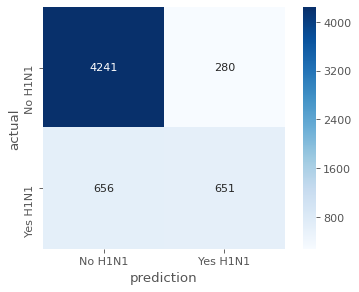

In [122]:
make_confusion_matrix(logit)

In [123]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logit, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [124]:
print(classification_report(label_test, logit.predict_proba(X_test)[:, 1] >= .2, target_names=["No H1N1", "Yes H1N1"]))

              precision    recall  f1-score   support

     No H1N1       0.92      0.80      0.85      4521
    Yes H1N1       0.52      0.75      0.61      1307

    accuracy                           0.79      5828
   macro avg       0.72      0.78      0.73      5828
weighted avg       0.83      0.79      0.80      5828



ROC AUC score =  0.8480659075127938


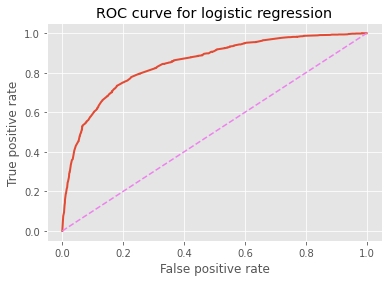

In [125]:
fpr, tpr, thresholds = roc_curve(label_test, (logit.predict_proba(X_test)[:, 1]))

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for logistic regression');
print("ROC AUC score = ", roc_auc_score(label_test, logit.predict_proba(X_test)[:,1]))

# more algos

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
knn = KNeighborsClassifier(n_neighbors=150)

logit = LogisticRegression(C = 0.95)

gnb = GaussianNB()

svc = SVC(probability=True)


dtc = DecisionTreeClassifier()


rfc = RandomForestClassifier()

classifier_list=[knn, logit, gnb, svc, dtc, rfc]

In [130]:
for c in classifier_list:
    c.fit(X_train, label_train)
    print(c)
    print(classification_report(label_test, c.predict(X_test), target_names=["No H1N1", "Yes H1N1"]))
    print("\n \n")

KNeighborsClassifier(n_neighbors=150)
              precision    recall  f1-score   support

     No H1N1       0.85      0.96      0.90      4521
    Yes H1N1       0.74      0.43      0.54      1307

    accuracy                           0.84      5828
   macro avg       0.80      0.69      0.72      5828
weighted avg       0.83      0.84      0.82      5828


 

LogisticRegression(C=0.95)
              precision    recall  f1-score   support

     No H1N1       0.87      0.94      0.90      4521
    Yes H1N1       0.70      0.50      0.58      1307

    accuracy                           0.84      5828
   macro avg       0.78      0.72      0.74      5828
weighted avg       0.83      0.84      0.83      5828


 

GaussianNB()
              precision    recall  f1-score   support

     No H1N1       0.89      0.85      0.87      4521
    Yes H1N1       0.56      0.65      0.60      1307

    accuracy                           0.81      5828
   macro avg       0.73      0.75      0.7

In [131]:
# area under curve
for c in classifier_list:
    c.fit(X_train, label_train)
    fpr, tpr, thresholds = roc_curve(label_test, (c.predict_proba(X_test)[:, 1]))
    print(c)
    print(roc_auc_score(label_test, c.predict_proba(X_test)[:,1]))
    print("\n \n")

KNeighborsClassifier(n_neighbors=150)
0.8487453855991599

 

LogisticRegression(C=0.95)
0.8480638766941048

 

GaussianNB()
0.8230580677064796

 

SVC(probability=True)
0.8120156603198505

 

DecisionTreeClassifier()
0.8289568344410604

 

RandomForestClassifier()
0.8360510764439079

 



# Lets try all 

KeyboardInterrupt: 